# CSCI 443 Homework 4

In homework 3, we left off with Z-scores and sampling distributions.  

In this homework we focus on confidence intervals and the effects of
skewness on computing confidence intervals.

## Part 1: Inline LaTeX support in Databricks.

Previously I had dollar signs ($) scattered throughout the 
text where I wanted to represent math.  I found the solution to this for Databricks.

In Jupyter notebooks, we can represnt LaTeX math within a line of text by surrounding 
the text with a single dollar sign on each side.  This doesn't work in Databricks.
However, with a little searching I found a syntax that DOES work to support inline LaTeX.
The same syntax works in both Databricks and Jupyter, and I will be using it going 
forward.

As an example:

>  In the early stages of a pandemic, the number of infections tends to 
>  grow exponentially.  In a fully susceptible population, the average number of 
>  secondary infections created by a single infected individual is called  the Basic
>  Reproduction Number (\\(R_0\\)).

\\(R_0\\) is an example of inline LaTeX, meaning the mathematical expression 
appears within the text.  This was achived by preceding the math with two 
blackslashes and an open parenthesis and succeeding the math with two backslashes
and a close parenthsis. \\(R_0\\) is written as

    \\\(R_0\\\)

Render the mathematical expressions described by the following by inserting
LaTeX into this workbook.

**Problem 1.1** Express PDF of a binomial distribution.  (NOTE: Not the binomial theorem which 
    was a problem in the last homework).

ANSWER HERE

**Problem 1.2** Express the formula for the sample variance, which is calculated as the sum of 
    squared deviations from the mean divided by the number of observations minus one.

ANSWER HERE

**Problem 1.3** Write a sentence that includes one over r squared within the text.  The intent
is to specifically exercise using inline LaTeX for this problem.
                                                
ANSWER HERE                                                                      

## Part 2: Formal definition for Skewness

We mostly covered skewness empirically.  "Follow the tails" being a useful mnemonic.

In most cases, a left (negative) skewed distribution is characterized by having
a mean that is less than the median, i.e., the heavy tail on the left has pulled
the mean to the left of the median.  Conversly, a right skewed distribuion is 
characterized by having a mean that is greater than the median.  We will not
encounter any distributions in this class where this is not true.  However, 
the relationship between the mean and median is merely a consequence, it isn't
the formal definition of skewness.  Skewness (\\(\gamma\\)) is most often defined 
as follows

$$\text{Skewness } \gamma = \frac{E[(X-\mu)^3]}{\sigma^3}$$

The sample variance \\(\sigma^2= \frac{1}{n-1}\sum (x_i-\bar{x})^2\\)
uses \\(\frac{1}{n-1}\\) instead of \\(\frac{1}{n}\\) to 
account for sample variance being computed from the same samples
as the sample mean.  

Sample Skewness (\\(G_1\\)) has a somewhat more complicated correction
to handle the bias introduced by computing the sample mean, sample
standard deviation, and sample skewness from the same samples.

$$G_1 = \frac{n}{(n-1)(n-2)}\sum_{i=1}^n \bigg(\frac{x_i-\bar{x}}{s}\bigg)^3$$

where

  - \\(n\\) is the number of samples
  - \\(x_i\\) is the \\(i^{th}\\) sample.
  - \\(\bar{x}\\) is the sample mean.

\\(\frac{n}{(n-1)(n-2)}\\) includes the correction for the bias 
introduced by computing \\(\bar{x}\\), \\(s\\), and 
\\(G_1\\) from the same samples.  The derivation of this
correction is outside the scope of the course, but I welcome
the student to study it further should they wish.



**Problem 2.1** Create code in this notebook to compute the sample skewness.

    def sample_skewness(samples) -> float:
      ...

In [ ]:
# ANSWER HERE

**Problem 2.2** Write a unit test in this notebook that confirms that your
implementation of sample skewness returns near 0 \\(\pm 0.05\\) for a
sufficient number of samples drawn from U[0,1].  U[0,1] is symmetric.
All symmetric distributions exhibit 0 skewness.  


In [ ]:
# ANSWER HERE

**Problem 2.3** Write a second unit test that confirms that your implementation returns \\(2 \pm 0.05\\) for a sufficient number of samples drawn from an exponential random variable with \\(\lambda=1\\).

In [ ]:
# ANSWER HERE

In [64]:
import matplotlib.pyplot as plt
import numpy as np

def plot_triangular_distribution(a, b, c):
    """
    Plots a triangular distribution with labels for a, b, and c.
    The peak (c) must be between a and b.
    
    Parameters:
    - a: The minimum value of the distribution
    - b: The maximum value of the distribution
    - c: location of the mode (peak) of the distribution
    """
    assert a <= c <= b 
    
    # Define points for the triangular shape
    x = [a, c, b]
    h = 2 / (b-a)
    w = b-a
    y = [0, h, 0]
    
    # Plotting the triangular distribution
    plt.figure(figsize=(8, 4))
    plt.plot(x, y, '-o', label='Triangular Distribution')
    
    # Annotating points a, b, and c
    plt.text(a - 0.025 * w, 0.05, 'a', ha='center', va='bottom', fontsize=12)
    plt.text(b + 0.025 * w, 0.05, 'b', ha='center', va='bottom', fontsize=12)
    plt.text(c, 1.05 * h, 'c', ha='center', va='bottom', fontsize=12)
    
    # Additional plot settings
    plt.fill_between(x, y, color='skyblue', alpha=0.5)
    plt.xlim([a - 0.1 * (b - a), b + 0.1 * (b - a)])
    plt.ylim([0, h * 1.15])
    plt.xlabel('Value')
    plt.ylabel('Probability Density')
    plt.title('Example Triangular Distribution')
    plt.grid(True)
    plt.show()




**Problem 2.4** Skewness of a distribution is defined as

\\[ \gamma = \frac{E[(X - \mu)^3]}{\sigma^3} = \frac{1}{\sigma^3} \int_{-\infty}^{\infty} (x - \mu)^3 f(x) \, dx \\]

A triangular distribution is defined by three parameters.  It has the pdf

\\[
f(x) = \begin{cases} 
  0      & \text{if } x \leq a \\
  \frac{2\cdot(x-a)}{(b-a)(c-a)}& \text{if } a \leq x \leq c \\
  \frac{2\cdot(c-x)}{(b-a)(c-b)}& \text{if } c \leq x \leq b \\
  0 & \text{if } x \geq b \\
\end{cases}
\\]

where 

 * \\(a\\) is the left corner of the triangle, i.e., the lower bound
   of the distribution's pdf.   
 * \\(b\\) is the right corner of the triangle, i.e., the upper bound
   of the distribution's pdf.
 * \\(c\\) is at the peak of the triangle, i.e., the mode of the
   distribution's pdf.

An example triangular distribution is shown below.


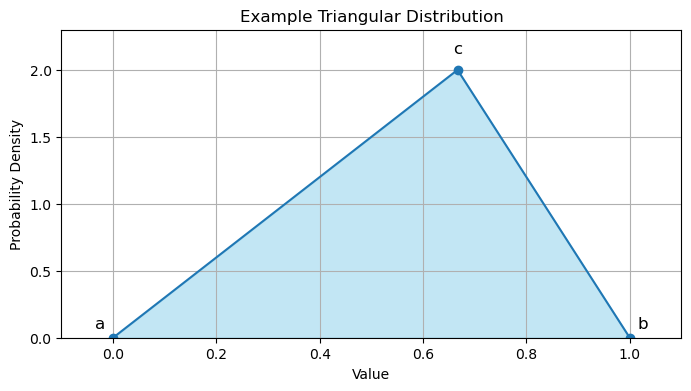

In [63]:
plot_triangular_distribution(a=0, b=1, c=2/3)


The mean of a triangular distribution is given by 

\\[ \mu = \frac{a + b + c}{3}\\]

A right triangular distribution with the peak on the right edge of the 
triangle has \\(b=c\\), as shown below.  The triangle is shifted to the 
left so that the mean resides at 0.


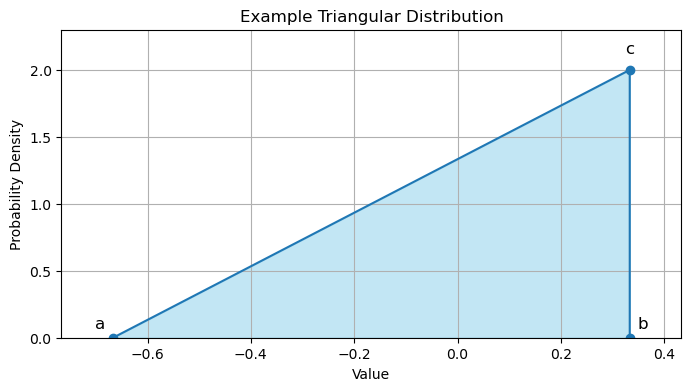

In [68]:
a, b, c = -2/3, 1/3, 1/3 
plot_triangular_distribution(a, b, c)

PDF of a right triangle distribution:

\\[ f(x) = \frac{2(x-a)}{(b-a)^2} \quad \text{for } a \leq x \leq b \\]

However, \\(b-a=1\\), \\(a=-2/3\\), and \\(b=1/3\\) causing the above to simplify

\\[ f(x) = 2(x-\frac{2}{3}) \quad \text{for } -\frac{2}{3} \leq x \leq \frac{1}{3} \\]

Derive the skewness for this distribution.

ANSWER HERE

## Part 3: Some intuition for sample variance and sample skewness.  

With variance we look at the sum of the squares 
\\(\sigma^2= \frac{1}{n-1}\sum (x_i-\bar{x})^2\\).
The square means that all terms in the summation are positive.  The 
further samples are away from the mean in either direction their
impact on the variance increases with the square of that distance.
Skewness uses the sum of the cubes.  Consider the case when
\\(\bar{x}\\) is 0 and let \\(C\\) denote \\(n/((n-1)(n-2))\\). The
computation of sample skewness simplifes to a sum of cubics: 

$$C\cdot \sum_{i=0}^{n} x^3$$

\\(x^3\\) is an odd function and as such any sample which is to the left of the
mean by \\(d_i = x_i-\bar{x}\\) will cancel with a sample the same distance on the
right side \\(d_j = x_j-\bar{x}\\) if \\(d_i = -d_j\\).  A symetric distribution 
thus has 0 skewness regardles of its variance.


**Problem 3.1** Write code in this notebook to draw 100 samples from a uniform random
variable \\(U[0,1]\\). Use matplotlib to create a relative
frequency histogram samples with 5 bins to confirm that the shape is 
roughly uniform.  Not all buckets will obtain the same number of samples.   
Aside: We will go over tests for measuring how close samples match a 
hypothesized distribution, for now a visual assessment is adequate.


In [1]:
# ANSWER HERE

**Problem 3.2** Create a plot that shows the sum of the squares 
\\(\sum_{i=1}^n (x_i-\bar{x})^2 \\) for the same samples as generated in Problem \\(\xcancel{2.5}\\) 3.1.
The x-axis should be \\(i\\) where \\(i\\) denotes the \\(i^{th}\\) sample.
The y-axis should be the sum of the squares up to the \\(i^{th}\\) sample.
This plot should be non-decreasing.  It demonstrates how sum of squares increases
whether samples fall above or below the mean.  

In [2]:
# ANSWER HERE
    

**Problem 3.3**  Order the samples from Problem 3.1 from smallest to largest and create another plot.  


In [3]:
# ANSWER HERE


**Problem 3.4** When the samples are ordered, what happens?  Explain the
shape.  What does the shape of the curve tell us about the contribution to the
variance of points that are farther from the mean?

ANSWER HERE

**Problem 3.5** Create another plot that shows the sum of the 
cubes \\(\sum_{i=1}^n (x_i - \bar{x})^3\\) for the same samples 
generated in Problem \\(\xcancel{2.2} 3.1\\).  The resulting plot should NOT be
increasing.

In [4]:
# ANSWER HERE

**Problem 3.6** Order the samples from smallest to largest and create the same plot again
but with the ordered samples.  


In [5]:
# ANSWER HERE

**Problem 3.7** How does this plot differ from the plot for cumulative sum of squares?
Note that the function is no longer non-decreasing.  How does the shape of the 
curve affect the contribution of the samples 
to the left of the mean vs. to the right of the mean for 
an unskewed distribution? 

ANSWER HERE

**Problem 3.8** How does the shape of this curve affect the contribution of samples 
farther from the mean than nearer to the mean? What happens if more samples
are near the mean on one-side of the distribution as would occur with 
a skewed distribution?

ANSWER HERE

## Part 4: Binomial Distributions and Confidence Intervals.

A *Bernoulli random variable* is defined by a single trial that can
result in one of two possible outcomes: 0 and 1, heads or tails, pass or file.  
One outcome occurs with probability \\(p\\), and the other outcome 
occurs with probability \\(1−p\\). 

A *binomial random variable* represents the sum of outcomes from a series 
of Bernoulli trials. Unlike continuous random variables, which can 
assume any value within a given range, a binomial random variable
can only take on integer values, because the binomial random variable
counts the number of successes in \\(n\\) trials, making it a discrete
random variable.

With continuous random variables, the probability that an outcome 
within a range occurs \\([a,b]\\) is given by the area under the probability
density function curve for that range.  We thus compute the probability
of an outcome landing in \\([a,b]\\) as the integral of the PDF from 
\\(a\\) to \\(b\\).  For a continuous random variable, the probability
of a specific outcome is zero: there is zero probability that the
exact same outcome occurs twice.  For continuous random variables
we only talk about the probability that an outcome occurs within a range.
Since we use the term "probability density," the integral over a range
is sometimes referred to as a "probability mass."

With a discrete random variable, the Probability Mass Function (PMF) assigns 
a discrete probability mass to each outcome.   The PMF for a binomial
random variable defines the probability of observing exactly
\\(k\\) successes in \\(n\\) Bernoulli trials, where each trial has a 
success probability of \\(p\\).  The binomial PMF is

$$P(X = k) = \binom{n}{k} p^k (1-p)^{n-k}$$

The *sample proportion* is the percentage of the sample that has an
outcome.  For a binomial random variable, which sums the outcomes of 
\\(n\\) independent Bernoulli trials, the sample proportion is used
to estimate the probability of success (\\(p\\)) of the underlying 
Bernoulli random variable.

**Problem 4.1** Use matplotlib to create a single plot containing 
the PMF of a Binomial random variable for \\(p=0.5\\).  A trial of a 
binomial random variable involves perfoming \\(n\\) Bernoulli trials.
Perform 1000 binomial trials each of \\(n=100\\) Bernoulli trials
with \\(p=0.5\\).  Perform each Bernoulli trial using a random
number generator.  Plot relative frequency histogram of the
Bernoulli trials on the same plot as the PMF of a binomial random 
variable.

In [ ]:
# ANSWER HERE

**Problem 4.2** Repeat Problem 4.1 for \\(p=0.2\\).

In [ ]:
# ANSWER HERE

**Problem 4.3** Repeat Problem 4.1 for \\(p=0.8\\).

In [ ]:
# ANSWER HERE

**Problem 4.4** Using your function implemented for Problem 2,
compute the sample skewness of the samples in Problem \\(\xcancel{3.1}\\) 4.1.

In [ ]:
# ANSWER HERE

**Problem 4.5** In the same way, compute the sample skewness of the samples 
in Problem \\(\xcancel{3.2}\\) 4.2.

In [ ]:
# ANSWER HERE

**Problem 4.6** In the same way, compute the sample skewness of the samples
in Problem \\(\xcancel{3.3}\\) 4.3.

In [ ]:
# ANSWER HERE

**Problem 4.7** (original wording) ~~For a binomial distribution with 
\\(n=5\\) and \\(p=0.2\\), simulate drawing 1000 sample sets each of size 5. 
Plot the sampling distribution of the sample proportion (i.e., the percentage of
outcomes with successes).  On the same plot place the PDF of a Gaussian random 
variable \\(N(p, \sigma/\sqrt{n})\\).   How does the Gaussian PDF relate
to computing confidence intervals?  Is the sampling distribution skewed or
symmetric?  How does it compare to the original distribution?~~

(revised wording and correction of standard deviation) For a binomial distribution with 
\\(n=5\\) and \\(p=0.2\\), simulate drawing 1000 samples of \\(X \sim Bin(n,p)\\) and 
computing the sample proportion .   The distribution of the sample proportion is the
sampling distribution of $p$. Plot this sampling distribution.  On the same plot place
the PDF of a Gaussian random variable \\(N(p, \sqrt{p(1-p)/n}\\).  How does the Gaussian PDF relate
to computing confidence intervals?  Is the sampling distribution skewed or
symmetric?  How does the Gaussian distribution compare to the distribution of the 
sample proportion?

In [ ]:
# ANSWER HERE

**Problem 4.8** For a binomial distribution with \\(n=40\\) and \\(p=0.2\\),
simulate drawing 1000 sample sets each of size 40.  Plot the sample distribution 
of the sample proportion.  How does increasing \\(n\\) affect the skewness of the
sampling distribution?

In [ ]:
# ANSWER HERE

**Problem 4.9** A \\(P\%\\) confidence interval for a statistic represents a range
within which we expect to find the true value of a population parameter that
the statistic estimates. More formally, if we were to repeat the
sampling process many times, each time calculating a new confidence
interval using the same procedure, we would expect approximately 
\\(P%\\) of these intervals to contain the true value of the population parameter. 
Aside: I used capital \\(P\\) to distinguish the confidence level \\((P)\\) from the \\(p\\) 
parameter of the binomial distribution.

For a binomial distribution with \\(n=5\\) and \\(p=0.2\\) construct 
1000 50% confidence intervals making the Gaussian assumption about the sampling 
distribution of the sample proportion.  Output the first 10 such 
confidence intervals.   Over the entire 1000 intervals, what fraction of the confidence
intervals contained \\(p\\)?

Aside: More typical confidence levels would be 95% or 99%.  I use 50% to demonstrate
a larger fraction of the true values of \\(p\\) lying outside the confidence interval.

In [ ]:
# ANSWER HERE

**Problem 4.10** Repeat 4.9 but use Student's t distribution rather than the 
Gaussian distribution to compute the confidence interval of the 
sampling distribution of the sample proportion.  Output the first 10 such 
confidence intervals.  What percentage
of the 1000 confidence intervals contained \\(p\\)?

In [ ]:
# ANSWER HERE

**Problem 4.11** Repeat 4.9 but with \\(n=40\\) and \\(p=0.2\\) construct
1000 50% confidence intervals making the Gaussian assumption about the sample 
distribution of the sample proportion.  Output the first 10 such 
confidence intervals.  What percentage of the 1000 confidence
intervals include \\(p\\)? 

In [ ]:
# ANSWER HERE

**Problem 4.12** What is the \\(n=30\\) rule of thumb for confidence
intervals?  Does it seem to apply for 4.10?  Is 40 enough for 
approximately 50% of the confidence intervals to include \\(p\\)?

In [ ]:
# ANSWER HERE

**Problem 4.13** Repeat 4.9 for a binomial distribution with \\(n=5\\)
and \\(p=0.5\\).  Did more confidence intervals contain \\(p\\)?
Why?

In [ ]:
# ANSWER HERE

**Problem 4.14** Repeat 4.10 for a binomial distribution with \\(n=5\\)
and \\(p=0.5\\).  

In [ ]:
# ANSWER HERE

**Problem 4.15** Repeat 4.11 for a binomial distribution with \\(n=40\\)
and \\(p=0.5\\).
 

In [6]:
# ANSWER HERE